In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from plato.detection import DetectionModel
from astropy import units as u

import numpy as np

In [3]:
model = DetectionModel()

In [4]:
r_star = 1.0 * u.Rsun
m_star = 1.0 * u.Msun
magnitude_v = 11.0
n_cameras = 24

In [5]:
# calculate detection efficies on a grid of r_planet and porb
r_planet = np.linspace(0.3, 3.0, 100) * u.Rearth
porb = np.geomspace(1, 2 * 365, 1000) * u.day

r_planet, porb = np.meshgrid(r_planet, porb)
eff = model.detection_efficiency(r_planet, r_star, porb, m_star, magnitude_v, n_cameras)

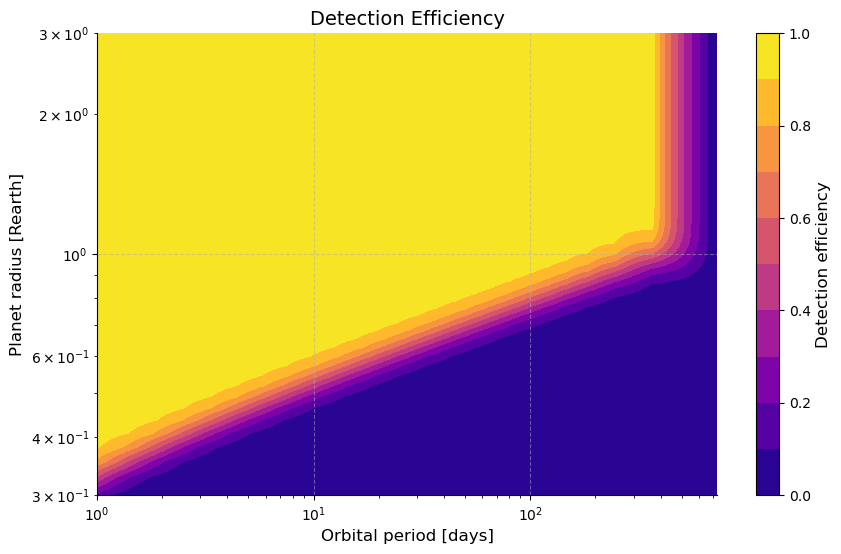

In [38]:
# plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size

# Customize the contour plot
contour = plt.contourf(
    porb,
    r_planet,
    eff,
    levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    cmap="plasma",  # Set the color map
    # extend="both",  # Extend the color map beyond the data range
)

# Add labels and title
plt.xlabel("Orbital period [days]", fontsize=12)
plt.ylabel("Planet radius [Rearth]", fontsize=12)
plt.title("Detection Efficiency", fontsize=14)

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label("Detection efficiency", fontsize=12)

# Set the scale of x and y axes
plt.xscale("log")
plt.yscale("log")

# Adjust tick labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()